In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("data Mashable.csv")

In [44]:
#print(df[df.columns[df.isnull().mean()>0.5]]) #Checking for missing values in colums higher than 50%

In [45]:
df = df.dropna(axis=0) #Dropping rows having more than half of missing values
df = df.reset_index(drop=True) #To drop all rows with NaN values
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [46]:
df.dtypes #Checking types of variables to choose

id                                 int64
url                               object
n_tokens_title                     int64
n_tokens_content                   int64
num_imgs                           int64
num_videos                         int64
average_token_length             float64
data_channel_is_lifestyle          int64
data_channel_is_entertainment      int64
data_channel_is_bus                int64
data_channel_is_socmed             int64
data_channel_is_tech               int64
data_channel_is_world              int64
weekday_is_monday                  int64
weekday_is_tuesday                 int64
weekday_is_wednesday               int64
weekday_is_thursday                int64
weekday_is_friday                  int64
weekday_is_saturday                int64
weekday_is_sunday                  int64
is_weekend                         int64
global_subjectivity              float64
global_sentiment_polarity        float64
title_subjectivity               float64
title_sentiment_

In [47]:
#Choosing variables
dfx = pd.DataFrame()
dfx['num_imgs'] = df['num_imgs']
dfx['num_videos'] = df['num_videos']
dfx['average_token_length'] = df['average_token_length']
dfx['global_subjectivity'] = df['global_subjectivity']
dfx['title_sentiment_polarity'] = df['title_sentiment_polarity']

These are the chosen variables because they are continous variables, and the plots(shown later) do show some relationship

In [48]:
dfx.fillna((df.median()),inplace = True) #if there are any missing values replace them with the median

In [90]:
dfx['shares_log'] = df['shares_log']

In [91]:
dfx.head() 

,num_imgs,num_videos,average_token_length,global_subjectivity,title_sentiment_polarity,shares_log
0,12,0,4.518879,0.439379,0.375,3.322219
1,6,0,5.040900,0.300454,0.000,2.437751
2,0,1,4.877863,0.575486,0.000,3.176091
3,2,0,4.974820,0.327220,0.000,3.301030
4,18,0,4.928409,0.507709,0.000,3.778151


Plots to check for linearity

Text(0, 0.5, 'shares_log')

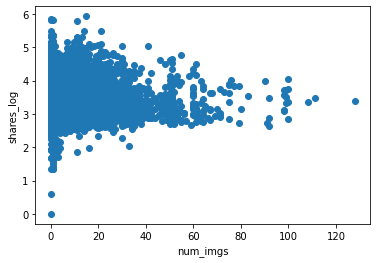

In [92]:
plt.scatter(df['num_imgs'],df['shares_log'])
plt.xlabel('num_imgs')
plt.ylabel('shares_log')

Text(0, 0.5, 'shares_log')

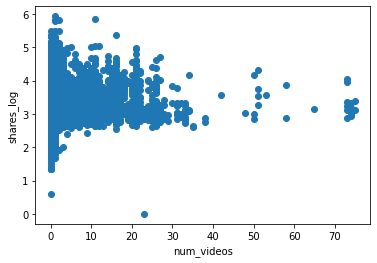

In [93]:
plt.scatter(df['num_videos'],df['shares_log'])
plt.xlabel('num_videos')
plt.ylabel('shares_log')

Text(0, 0.5, 'shares_log')

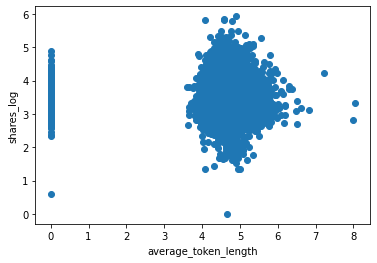

In [94]:
plt.scatter(df['average_token_length'],df['shares_log'])
plt.xlabel('average_token_length')
plt.ylabel('shares_log')

Text(0, 0.5, 'shares_log')

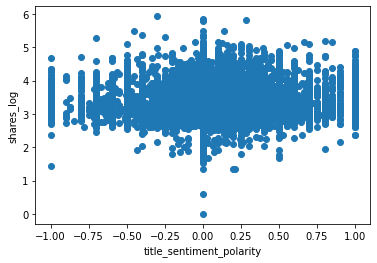

In [95]:
plt.scatter(df['title_sentiment_polarity'],df['shares_log'])
plt.xlabel('title_sentiment_polarity')
plt.ylabel('shares_log')

Text(0, 0.5, 'shares_log')

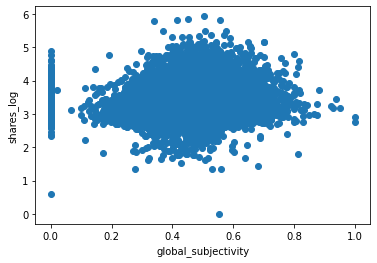

In [96]:
plt.scatter(df['global_subjectivity'],df['shares_log'])
plt.xlabel('global_subjectivity')
plt.ylabel('shares_log')

There is not much linear relationship between shares_log and the independent variables

# Simple linear regression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [98]:
y = dfx['shares_log'].values
dfx = dfx.drop('shares_log',axis=1)
x = dfx.values

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
lm = LinearRegression() #this creates a new LR model
lm.fit(x_train,y_train)

LinearRegression()

# Equation of the model

In [101]:
b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept
b2 = lm.coef_[1]
b3 = lm.coef_[2]
b4 = lm.coef_[3]
b5 = lm.coef_[4]
print(b0,b1,b2,b3,b4,b5)

3.259660421996151 0.0037051281157028403 0.002558180517218776 -0.057835960862121866 0.5236601086242265 0.05703937428671814


In [103]:
print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X + {b2:.3f}X + {b3:.3f}X + {b4:.3f}X + {b5:.3f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 3.260 + 0.004X + 0.003X + -0.058X + 0.524X + 0.057X


$Y = 3.260 + 0.004num/imgs +0.003num/videos - 0.058average/token/length + 0.524global/subjectivity + 0.057title/sentiment/polarity$

Where Y is shares_log and X chosen variables.

We can now use the lm.predict method to make predictions for differnt values of X. 

In [104]:
y_pred = lm.predict(x_test)
y_pred

array([3.23705468, 3.24234007, 3.24966106, ..., 3.28198155, 3.28880081,
       3.24790482])

# Evaluating the model

In [105]:
r2_score(y_test,y_pred)

0.028578830650469844

In [106]:
mean_squared_error(y_test,y_pred)

0.1658781260726419

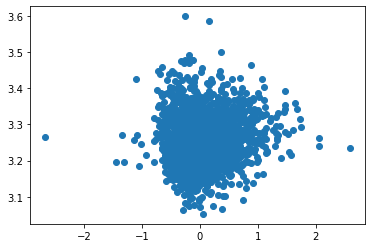

In [37]:
residuals = y_test - y_pred #investigating residual
plt.scatter(residuals, y_pred)
plt.show()